In [ ]:
# export
# Imports
import pandas as pd
from numpy import mean, std
from statistics import median
from scipy.stats import sem, t
import lizard
import matplotlib.pyplot as plt
from tree_sitter import Language, Parser, Node
#Decoding files
import chardet
from bs4 import UnicodeDammit


# TODO: Remove when mongo call is implemented
import os

from ds4se.desc.metrics import java
############################################################

# --get_unicode(file_path) usage example--

In [ ]:
#export
# --get_unicode(file_path) usage example--
# Setting up test data
file_path = "test_utf_8_file.txt"
with open(file_path, 'w', encoding="utf-8") as f:
    f.write("Hello, this is a test file")
# Calling function
text, encoding = java.get_unicode(file_path)
# Cleanup
os.remove(file_path)
# Displaying output
print(encoding)
print(text)
"""Note, the function detects ascii instead of utf-8 because 
ascii is a more specific subset of utf-8 which is still able 
to completely decode this file. Similar inaccuracies occur with 
many encodings but will not affect program results."""
############################################################

ascii
Hello, this is a test file


'Note, the function detects ascii instead of utf-8 because \nascii is a more specific subset of utf-8 which is still able \nto completely decode this file. Similar inaccuracies occur with \nmany encodings but will not affect program results.'

# --simulate_getting_dataframes_from_mongo(folder_path) usage example--

In [ ]:
#export
#--simulate_getting_dataframes_from_mongo(folder_path) usage example--
# Setting up test data
file_path = "test_file.txt"
folder_path = "test_dir"
if(not folder_path):
    os.mkdir(folder_path)
with open(os.path.join(folder_path, file_path), 'w') as f:
    f.write("Hello, this is a test file")
# Calling function
pd_dataframe = java.simulate_getting_dataframes_from_mongo(folder_path)
# Cleanup
os.remove(os.path.join(folder_path,file_path))
os.rmdir(folder_path)
# Displaying output
pd.set_option('display.expand_frame_repr', False)
pd_dataframe.head()
############################################################

,system,name,ground_truth,contents,encoding
0,None,test_file.txt,src,"Hello, this is a test file",ascii


# --add_mccabe_metrics(df, data_col, name_col) usage example--

In [ ]:
#export
#--add_mccabe_metrics(df, data_col, name_col) usage example--
# Setting up test data
file_path = "test_java_file.java"
folder_path = "test_dir"
if(not folder_path):
    os.mkdir(folder_path)
with open(os.path.join(folder_path, file_path), 'w') as f:
    f.write("public int main() {}")
# Calling function
pd_dataframe = java.simulate_getting_dataframes_from_mongo(folder_path)
pd_dataframe = java.add_mccabe_metrics(pd_dataframe, "contents", "name")
# Cleanup
os.remove(os.path.join(folder_path,file_path))
os.rmdir(folder_path)
# Displaying output
pd.set_option('display.expand_frame_repr', False)
pd_dataframe.head()
############################################################

,system,name,ground_truth,contents,encoding,num_funcs,class_ccn,avg_func_ccn,avg_func_nloc
0,None,test_java_file.java,src,public int main() {},ascii,[1],[1],[1.0],[1.0]


# --add_lcom5(df, col) usage example--

In [ ]:
#export
#--add_lcom5(df, col) usage example--
# Setting up test data
file_path = "test_java_file.java"
folder_path = "test_dir"
if(not folder_path):
    os.mkdir(folder_path)
with open(os.path.join(folder_path, file_path), 'w') as f:
    f.write("class SomeClass {int var, i, able; public int main() {return 0;} public void helper() {return i;}}")
# Calling function
pd_dataframe = java.simulate_getting_dataframes_from_mongo(folder_path)
pd_dataframe = java.add_lcom5(pd_dataframe, "contents")
# Cleanup
os.remove(os.path.join(folder_path,file_path))
os.rmdir(folder_path)
# Displaying output
pd.set_option('display.expand_frame_repr', False)
pd_dataframe.head()
############################################################

FileNotFoundError: [Errno 2] No such file or directory: 'tree-sitter-java/src/parser.c'

# --flatten_lol(list_list) usage example--

In [ ]:
#export
# --flatten_lol(list_list) usage example--
# Setting up test data
list_of_lists = [[1, 2, 3], [5, 6, 7], ["apple", "pear", "banana"]]
# Calling function
flattened = java.flatten_lol(list_of_lists)
# Displaying output
print(flattened)
############################################################

[1, 2, 3, 5, 6, 7, 'apple', 'pear', 'banana']


# --display_numeric_col_stats(col, conf = 0.95, sig_figs = 4, clean=True, verbose_clean=False) usage example--

In [ ]:
#export
# --display_numeric_col_stats(col, conf = 0.95, sig_figs = 4, clean=True, verbose_clean=False) usage example--
# Setting up test data
data = [[1, 2, 3], [3, 3, 4, 5], ["apple" "banana"]]
flat_data = java.flatten_lol(data)
# Calling function
java.display_numeric_col_stats(flat_data)
"""Note: the function ignores not-numeric entries, so apple, 
pear and banana do not create issues"""
############################################################

Min = 1
Max = 5
Average = 3.0
Median = 3
Standard Deviation = 1.1952
0.95 of data points fall between 1.806 and 4.194


'Note: the function ignores not-numeric entries, so apple, \npear and banana do not create issues'

# --display_numeric_col_hist(col, col_name="measure", num_bins=None, clean=True, verbose_clean=False) usage example--

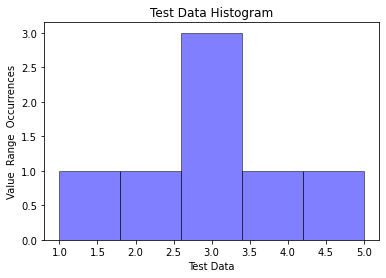

'Note: the function ignores not-numeric entries, so apple, \npear and banana do not create issues'

In [ ]:
#export
# --display_numeric_col_hist(col, col_name="measure", num_bins=None, clean=True, verbose_clean=False) usage example--
# Setting up test data
data = [[1, 2, 3], [3, 3, 4, 5], ["apple" "banana"]]
flat_data = java.flatten_lol(data)
# Calling function
java.display_numeric_col_hist(flat_data, "Test Data", num_bins=5)
"""Note: the function ignores not-numeric entries, so apple, 
pear and banana do not create issues"""
############################################################

# Analysis Visualization

In [ ]:
#export
# Retrieve the data
path = "../data_management/traceability_data/raw/SMOS_semeru_format/source_code"
corpus_df = java.simulate_getting_dataframes_from_mongo(path)
total_file_count = len(corpus_df)
print("Total files:", total_file_count)

FileNotFoundError: [Errno 2] No such file or directory: '../data_management/traceability_data/raw/SMOS_semeru_format/source_code'

In [ ]:
#export
# Add the new metric columns to the corpus dataframe
corpus_df = java.add_mccabe_metrics(corpus_df, 'contents', 'name')
corpus_df = java.add_lcom5(corpus_df, 'contents')
pd.set_option('display.expand_frame_repr', False)
corpus_df.head(15)

NameError: name 'corpus_df' is not defined

In [ ]:
#export
# Print statistical information about the number of functions per class
java.display_numeric_col_hist(flatten_lol(corpus_df['num_funcs']), "Class Number of Methods")
java.display_numeric_col_stats(flatten_lol(corpus_df['num_funcs']))

NameError: name 'display_numeric_col_hist' is not defined

In [ ]:
#export
# Print statistical information about the cyclomatic complexity per class
java.display_numeric_col_hist(flatten_lol(corpus_df['class_ccn']), "Class Cyclomatic Complexity")
java.display_numeric_col_stats(flatten_lol(corpus_df['class_ccn']))

NameError: name 'display_numeric_col_hist' is not defined

In [ ]:
#export
# Print statistical information about the average cyclomatic complexity of functions in each class
java.display_numeric_col_hist(flatten_lol(corpus_df['avg_func_ccn']), "Avg Method Cyclomatic Complexity")
java.display_numeric_col_stats(flatten_lol(corpus_df['avg_func_ccn']))

NameError: name 'display_numeric_col_hist' is not defined

In [ ]:
#export
# Print statistical information about the average number of lines of code for functions in each class
java.display_numeric_col_hist(flatten_lol(corpus_df['avg_func_nloc']), "Average Method Lines of Code")
java.display_numeric_col_stats(flatten_lol(corpus_df['avg_func_nloc']))

NameError: name 'display_numeric_col_hist' is not defined

In [ ]:
#export
# Print statistical information about the LCOM5 of each class
java.display_numeric_col_hist(flatten_lol(corpus_df['class_lcom5']), "Class LCOM5")
java.display_numeric_col_stats(flatten_lol(corpus_df['class_lcom5']))

NameError: name 'display_numeric_col_hist' is not defined